In [272]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [273]:
FULL_DF = pd.read_csv('full_data.csv')

In [274]:
FULL_DF.columns

Index(['post_id', 'url', 'title', 'ups', 'downs', 'score', 'author', 'time',
       'num_comments'],
      dtype='object')

In [275]:
FULL_DF.shape

(22701, 9)

In [276]:
FULL_DF.head()

,post_id,url,title,ups,downs,score,author,time,num_comments
0,1u4yx0,http://www.zerohedge.com/news/2013-12-29/russi...,Russia wishes NATO a Happy New Year by posing ...,422,0,422,dotormotor,1388546803,114
1,1u50fw,http://www.democracynow.org/2013/12/31/wikilea...,WikiLeaks’ Julian Assange Calls on Computer Ha...,1165,0,1165,ernieche,1388548387,171
2,1u57ld,http://www.nytimes.com/2014/01/01/world/middle...,Egypt Says 3 Journalists Will Be Held 15 More ...,98,0,98,wndrgls,1388556209,6
3,1u5hdf,http://www.nydailynews.com/news/world/saudi-pr...,Saudi royal faces death penalty for murder of ...,128,0,128,davidreiss666,1388570650,33
4,1u5jw2,http://www.theguardian.com/world/2013/dec/31/e...,Elephant deaths rise in Tanzania after shoot-t...,800,0,800,anutensil,1388575499,91


In [277]:
#time range of posts
FULL_DF['time'] = FULL_DF['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
FULL_DF.head()

,post_id,url,title,ups,downs,score,author,time,num_comments
0,1u4yx0,http://www.zerohedge.com/news/2013-12-29/russi...,Russia wishes NATO a Happy New Year by posing ...,422,0,422,dotormotor,2013-12-31,114
1,1u50fw,http://www.democracynow.org/2013/12/31/wikilea...,WikiLeaks’ Julian Assange Calls on Computer Ha...,1165,0,1165,ernieche,2013-12-31,171
2,1u57ld,http://www.nytimes.com/2014/01/01/world/middle...,Egypt Says 3 Journalists Will Be Held 15 More ...,98,0,98,wndrgls,2014-01-01,6
3,1u5hdf,http://www.nydailynews.com/news/world/saudi-pr...,Saudi royal faces death penalty for murder of ...,128,0,128,davidreiss666,2014-01-01,33
4,1u5jw2,http://www.theguardian.com/world/2013/dec/31/e...,Elephant deaths rise in Tanzania after shoot-t...,800,0,800,anutensil,2014-01-01,91


In [278]:
FULL_DF = FULL_DF[(FULL_DF['time'].str.startswith('2014')) | (FULL_DF['time'].str.startswith('2015'))]
FULL_DF.shape

(22690, 9)

In [416]:
FULL_DF[FULL_DF.time.str.startswith('2015')].shape

(11947, 9)

In [293]:
FULL_DF.title.nunique()

22642

In [294]:
FULL_DF.url.nunique()

22556

In [296]:
FULL_DF.post_id.nunique()

22588

In [299]:
# since i need to get comment from post id, I need to drop wierd duplicate post ids
FULL_NEW_DF = FULL_DF[FULL_DF['post_id'].isin(FULL_DF['post_id'].drop_duplicates(keep=False))]

In [300]:
FULL_NEW_DF.post_id.nunique()

22490

In [417]:
#import news data
NEWS_DF = pd.read_csv('newspaper.csv')
NEWS_DF.columns = ['post_id', 'url', 'title', 'author', 'date', 'text', 'keywords', 'summary']
NEWS_DF.head()

,post_id,url,title,author,date,text,keywords,summary
0,3ddrv9,http://www.bloomberg.com/news/articles/2015-07...,India to Kick Off Solar Program This Month Wit...,['Anindya Upadhyay'],07/06/2015,India will open its solar-expansion program th...,"['rupees', 'million', 'kick', 'solar', 'gigawa...",India will open its solar-expansion program th...
1,2t6d12,http://www.theregister.co.uk/2015/01/20/gotcha...,Mystery radio signal picked up from beyond our...,[],01/20/2015,The Australian Parkes radiotelescope – even th...,"['observed', 'astronomers', 'signal', 'parkes'...",The Australian Parkes radiotelescope – even th...
2,1u4yx0,http://www.zerohedge.com/news/2013-12-29/russi...,Russia wishes NATO a Happy New Year by posing ...,[],12/29/2013,Russian Deputy Prime Minister Dmitry Rogozin h...,"['russia', 'wishes', 'happy', 'wish', 'unusual...",Russian Deputy Prime Minister Dmitry Rogozin h...
3,2t6dcr,http://m.ibtimes.com/gov-bobby-jindal-says-mus...,Gov. Bobby Jindal Says Muslim ‘No-Go Zones’ Do...,[],01/19/2015,Louisiana Gov. Bobby Jindal refused to back do...,"['apology', 'gov', 'jindal', 'think', 'country...",Bobby Jindal refused to back down on the exist...
4,3dds34,http://www.independent.co.uk/news/world/europe...,Angela Merkel: Marriage is a man and a woman ...,[],NaN,We've noticed that you are using an ad blocker...,"['worldwide', 'truly', 'war', 'helps', 'notice...",We've noticed that you are using an ad blocker...


In [418]:
NEWS_DF['author'] = NEWS_DF['author'].fillna('')
NEWS_DF['keywords'] = NEWS_DF['keywords'].fillna('')
NEWS_DF['author'] = NEWS_DF['author'].apply(lambda x: x.strip("'[]"))
NEWS_DF['keywords'] = NEWS_DF['keywords'].apply(lambda x: x.strip("[]"))
NEWS_DF['keywords'] = NEWS_DF['keywords'].apply(lambda x: x.replace("'", ''))

In [419]:
NEWS_DF.head()

,post_id,url,title,author,date,text,keywords,summary
0,3ddrv9,http://www.bloomberg.com/news/articles/2015-07...,India to Kick Off Solar Program This Month Wit...,Anindya Upadhyay,07/06/2015,India will open its solar-expansion program th...,"rupees, million, kick, solar, gigawatts, megaw...",India will open its solar-expansion program th...
1,2t6d12,http://www.theregister.co.uk/2015/01/20/gotcha...,Mystery radio signal picked up from beyond our...,,01/20/2015,The Australian Parkes radiotelescope – even th...,"observed, astronomers, signal, parkes, way, ra...",The Australian Parkes radiotelescope – even th...
2,1u4yx0,http://www.zerohedge.com/news/2013-12-29/russi...,Russia wishes NATO a Happy New Year by posing ...,,12/29/2013,Russian Deputy Prime Minister Dmitry Rogozin h...,"russia, wishes, happy, wish, unusual, twitter,...",Russian Deputy Prime Minister Dmitry Rogozin h...
3,2t6dcr,http://m.ibtimes.com/gov-bobby-jindal-says-mus...,Gov. Bobby Jindal Says Muslim ‘No-Go Zones’ Do...,,01/19/2015,Louisiana Gov. Bobby Jindal refused to back do...,"apology, gov, jindal, think, country, wants, z...",Bobby Jindal refused to back down on the exist...
4,3dds34,http://www.independent.co.uk/news/world/europe...,Angela Merkel: Marriage is a man and a woman ...,,NaN,We've noticed that you are using an ad blocker...,"worldwide, truly, war, helps, noticed, investi...",We've noticed that you are using an ad blocker...


In [421]:
# get ride of obs without news text
NEWS_DF = NEWS_DF[NEWS_DF['post_id'].isin(FULL_NEW_DF['post_id'])]
NEWS_DF = NEWS_DF[~NEWS_DF['text'].isnull()]
NEWS_DF = NEWS_DF.drop_duplicates(keep=False)
NEWS_DF.shape

(19874, 8)

In [422]:
# get whole dataset again after filtering problematic rows from the newspaper dataset
TARGET_DF = FULL_NEW_DF[FULL_NEW_DF['post_id'].isin(NEWS_DF['post_id'])]
TARGET_DF = TARGET_DF.drop_duplicates()
TARGET_DF.shape

(19874, 9)

In [425]:
TARGET_DF[TARGET_DF.time.str.startswith('2015')].shape

(10720, 9)

<IPython.core.display.Javascript object>


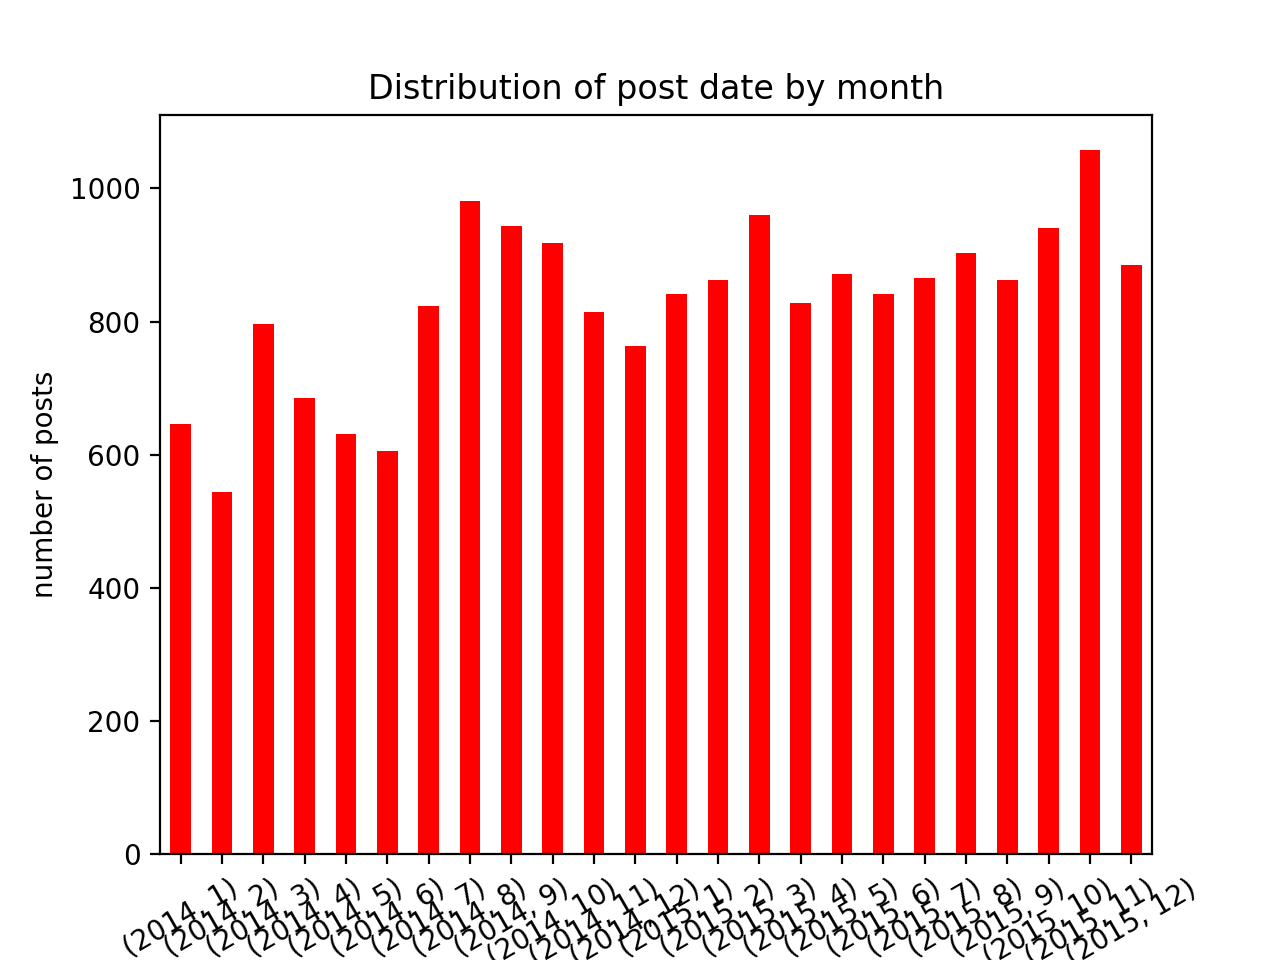

In [427]:
# get distribution of published date (post)
POST_DATE = pd.to_datetime(TARGET_DF['time'])
ax = POST_DATE.groupby([POST_DATE.dt.year, 
                   POST_DATE.dt.month]).count().plot(kind="bar", 
                                                     rot=30,
                                                     color = 'r',
                                                     title = "Distribution of post date by month")
ax.set_xlabel("month")
ax.set_ylabel("number of posts")
ax.get_figure().savefig("output1.png")

In [429]:
NEWS_DATE = NEWS_DF.date.dropna()
NEWS_DATE = NEWS_DATE.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))
NEWS_DATE = NEWS_DATE[(NEWS_DATE.str.startswith('2015'))|\
                      (NEWS_DATE.str.startswith('2014'))]\
#                       (NEWS_DATE.str.startswith('2016'))|\
#                       (NEWS_DATE.str.startswith('2013'))]
NEWS_DATE.shape

(12849,)

<IPython.core.display.Javascript object>


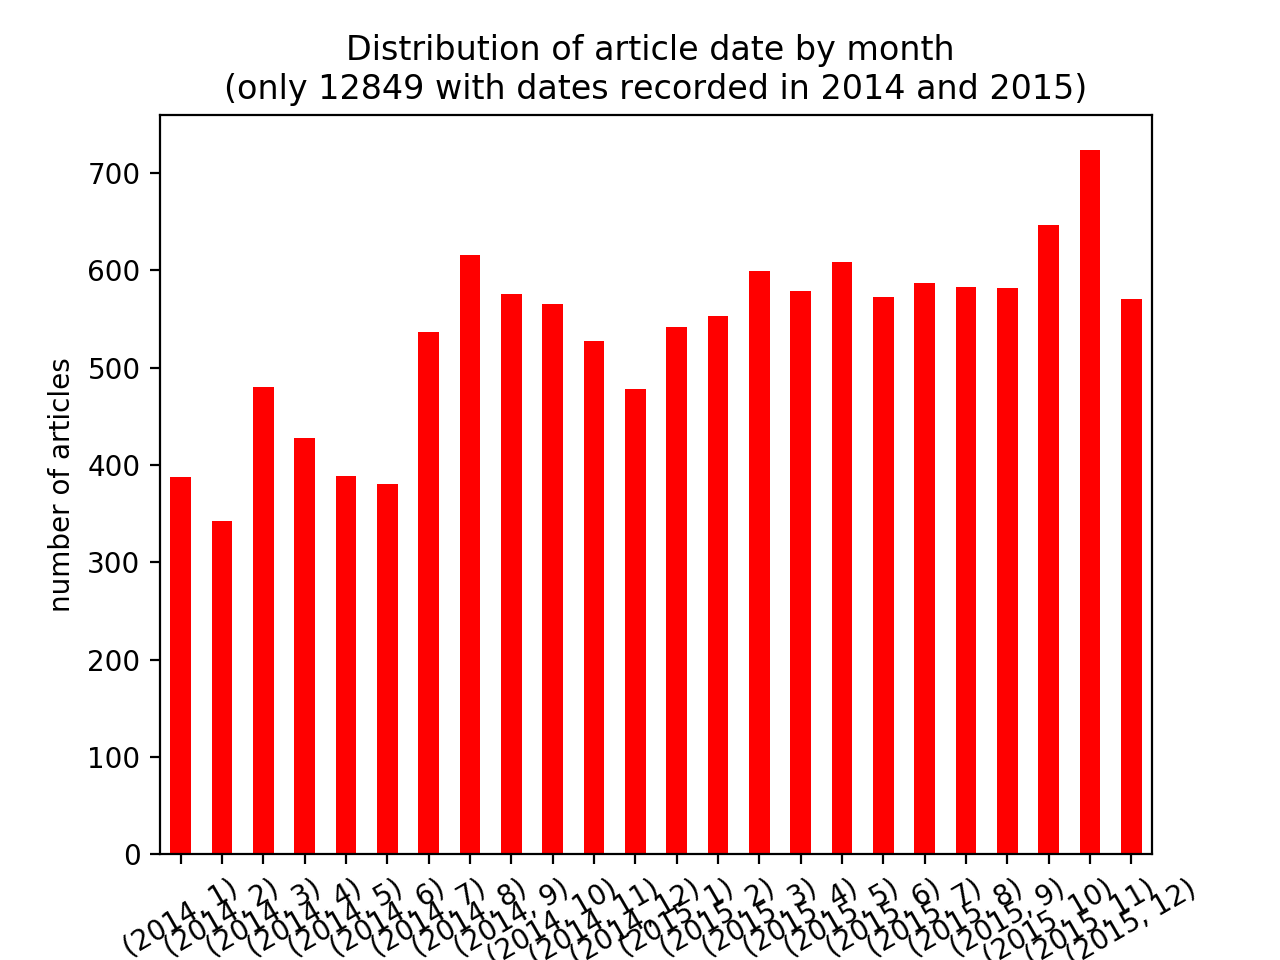

In [430]:
# get distribution of published date (article)
NEWS_DATE = pd.to_datetime(NEWS_DATE)
ax = NEWS_DATE.groupby([NEWS_DATE.dt.year, 
                   NEWS_DATE.dt.month]).count().plot(kind="bar", 
                                                     rot=30,
                                                     color = 'r',
                                                     title = "Distribution of article date by month \n(only 12849 with dates recorded in 2014 and 2015)")
ax.set_xlabel("month")
ax.set_ylabel("number of articles")
ax.get_figure().savefig("output2.png")

In [ ]:
# get num_comment distribution, upvotes distribution, relationship

In [352]:
NUM_COMMENT = TARGET_DF['num_comments']
NUM_COMMENT.shape

(19874,)

In [435]:
print("number of comments' maximum: %d, minimum: %d, mean: %d, median: %d, std: %d "
      "25 percent quantile: %d and 75 percent quantile: %d"%
      (NUM_COMMENT.max(), NUM_COMMENT.min(), NUM_COMMENT.mean(), NUM_COMMENT.median(), NUM_COMMENT.std(),
       NUM_COMMENT.quantile(q=0.25), NUM_COMMENT.quantile(q=0.75)))

number of comments' maximum: 27896, minimum: 0, mean: 317, median: 80, std: 767 25 percent quantile: 25 and 75 percent quantile: 268


In [443]:
NUM_COMMENT[NUM_COMMENT < 10000].shape

(19863,)

<IPython.core.display.Javascript object>


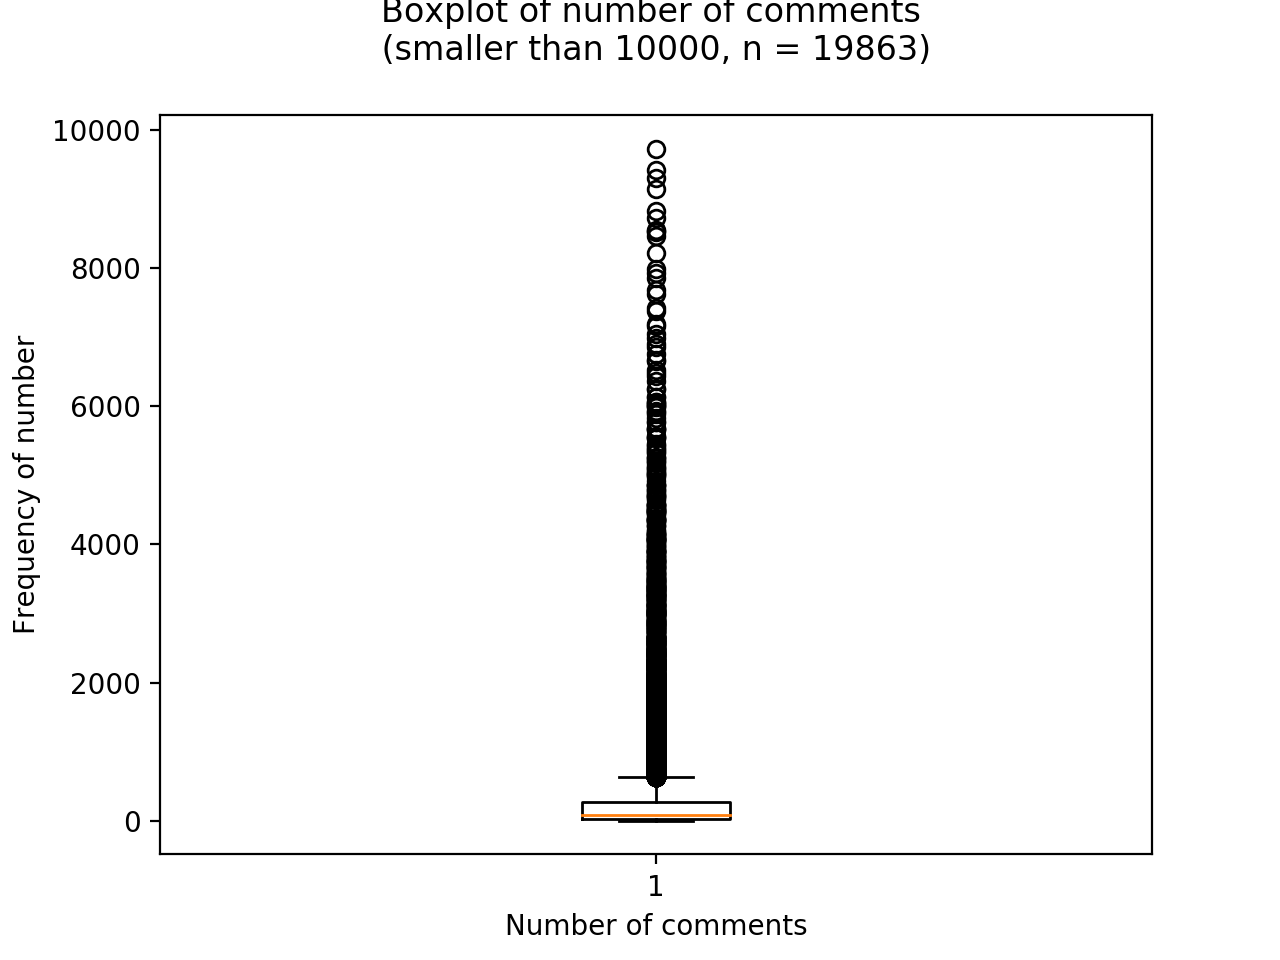

In [464]:
#boxplot of number of comments
fig, ax = plt.subplots()
ax.set_title('Boxplot of number of comments \n (smaller than 10000, n = 19863) \n')
ax.set_xlabel('Number of comments')
ax.set_ylabel('Frequency of number')
ax.boxplot(NUM_COMMENT[(NUM_COMMENT < 10000)])
ax.get_figure().savefig("output3.png")

In [394]:
NUM_COMMENT[NUM_COMMENT < 1000].shape

(18347,)

<IPython.core.display.Javascript object>


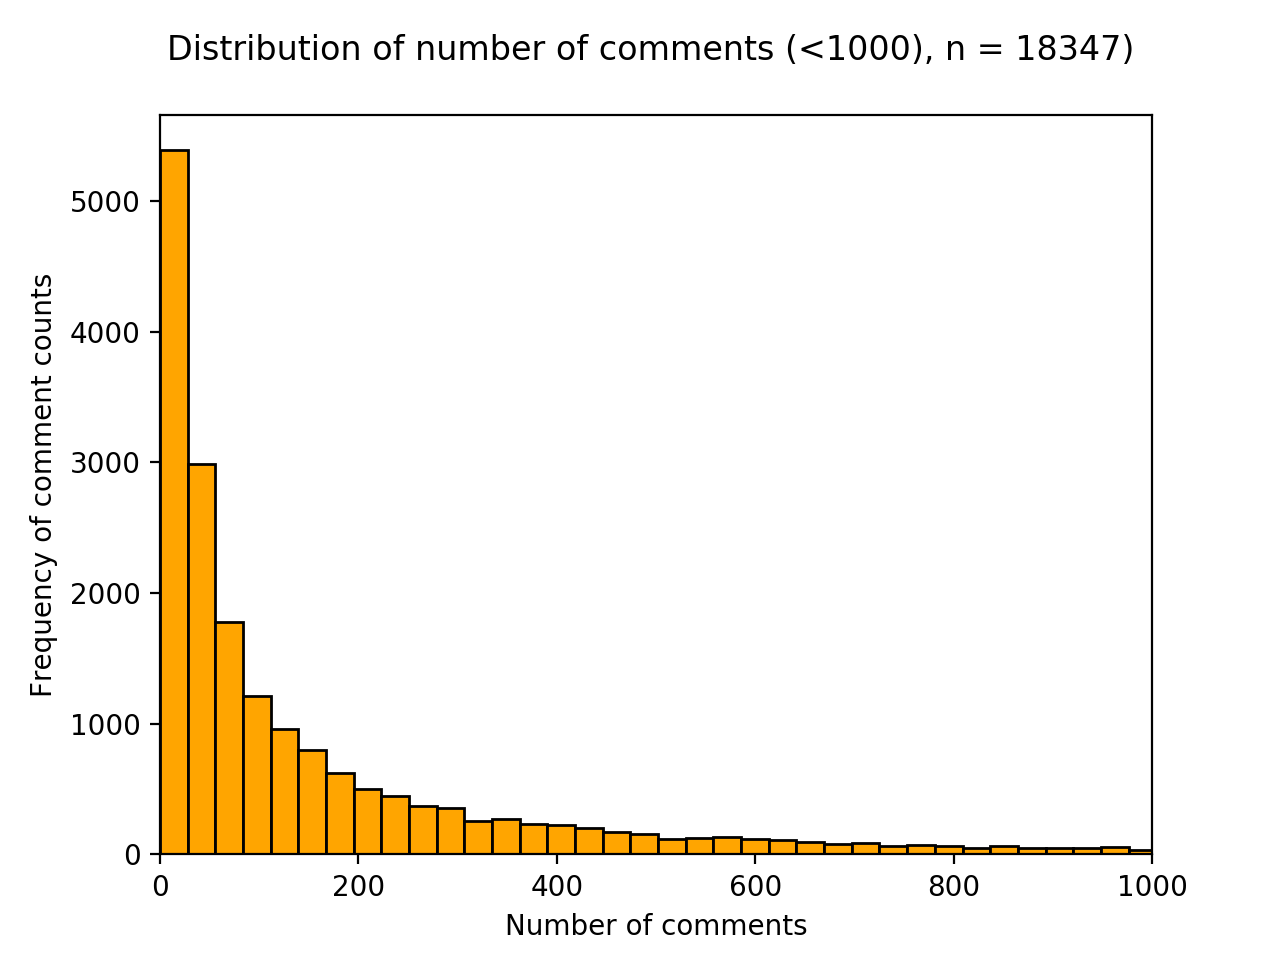

In [465]:
#distribution of comments
count, bins, ignored = plt.hist(NUM_COMMENT, 1000, edgecolor='black', color = 'orange', alpha = 1)
# plt.ylim([0, 2000])
plt.xlim([0, 1000])
plt.title('Distribution of number of comments (<1000), n = 18347) \n')
plt.xlabel('Number of comments')
plt.ylabel('Frequency of comment counts')
plt.savefig("output4.png")

In [393]:
SCORE = TARGET_DF['score']
SCORE.shape

(19874,)

In [468]:
SCORE[SCORE<80000].shape

(19871,)

In [436]:
print("scores (upvotes)' maximum: %d, minimum: %d, mean: %d, median: %d, std: %d "
      "25 percent quantile: %d and 75 percent quantile: %d"%
      (SCORE.max(), SCORE.min(), SCORE.mean(), SCORE.median(), SCORE.std(),
       SCORE.quantile(q=0.25), SCORE.quantile(q=0.75)))

scores (upvotes)' maximum: 106049, minimum: 0, mean: 1544, median: 283, std: 4250 25 percent quantile: 99 and 75 percent quantile: 976


<IPython.core.display.Javascript object>


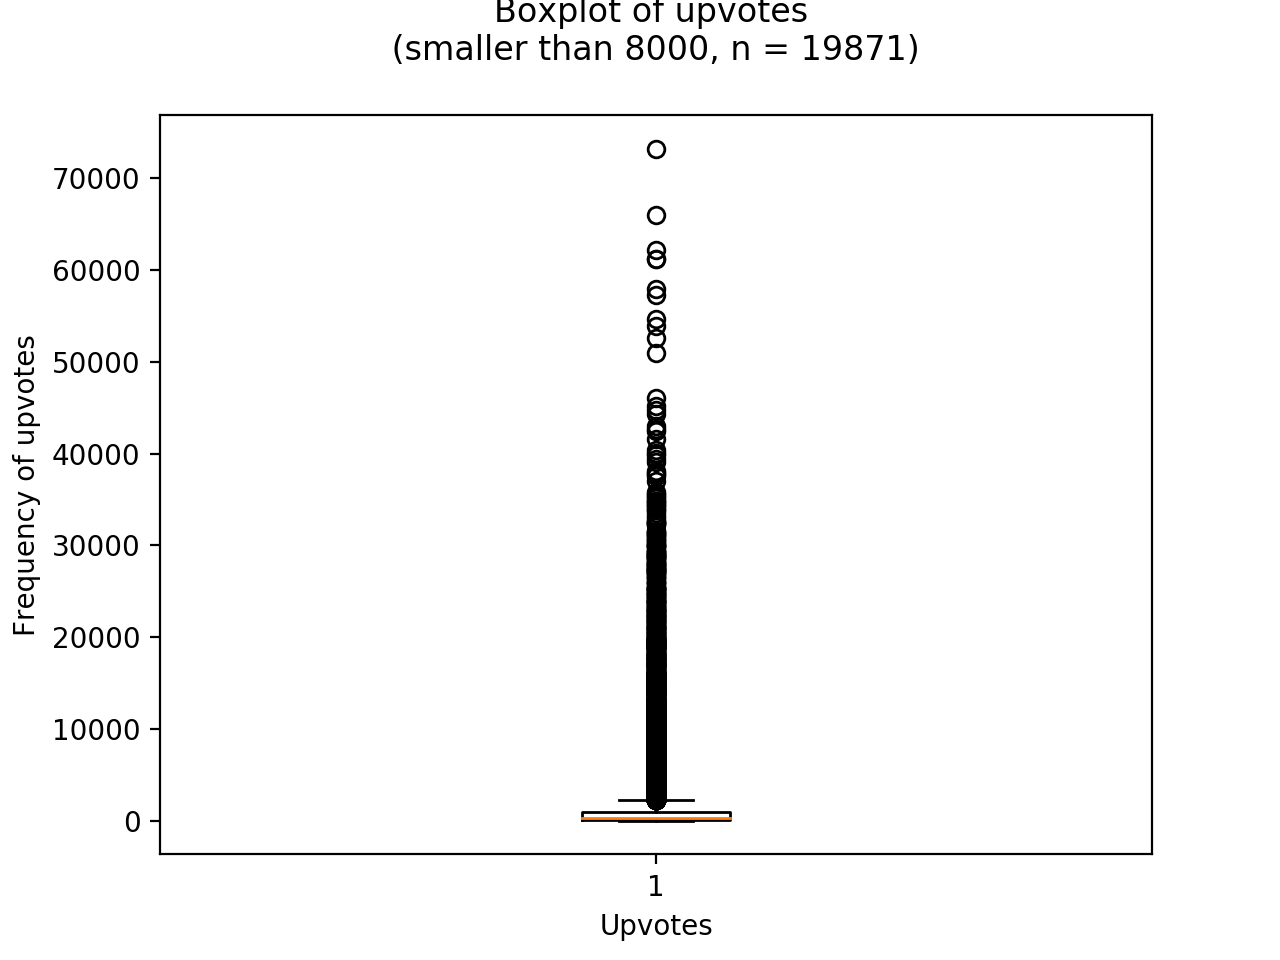

In [472]:
#boxplot of score
fig, ax = plt.subplots()
ax.set_title('Boxplot of upvotes \n (smaller than 8000, n = 19871) \n')
ax.set_xlabel('Upvotes')
ax.set_ylabel('Frequency of upvotes')
ax.boxplot(SCORE[(SCORE < 80000)])
ax.get_figure().savefig('output5.png')

In [405]:
SCORE[SCORE < 5000].shape

(18547,)

<IPython.core.display.Javascript object>


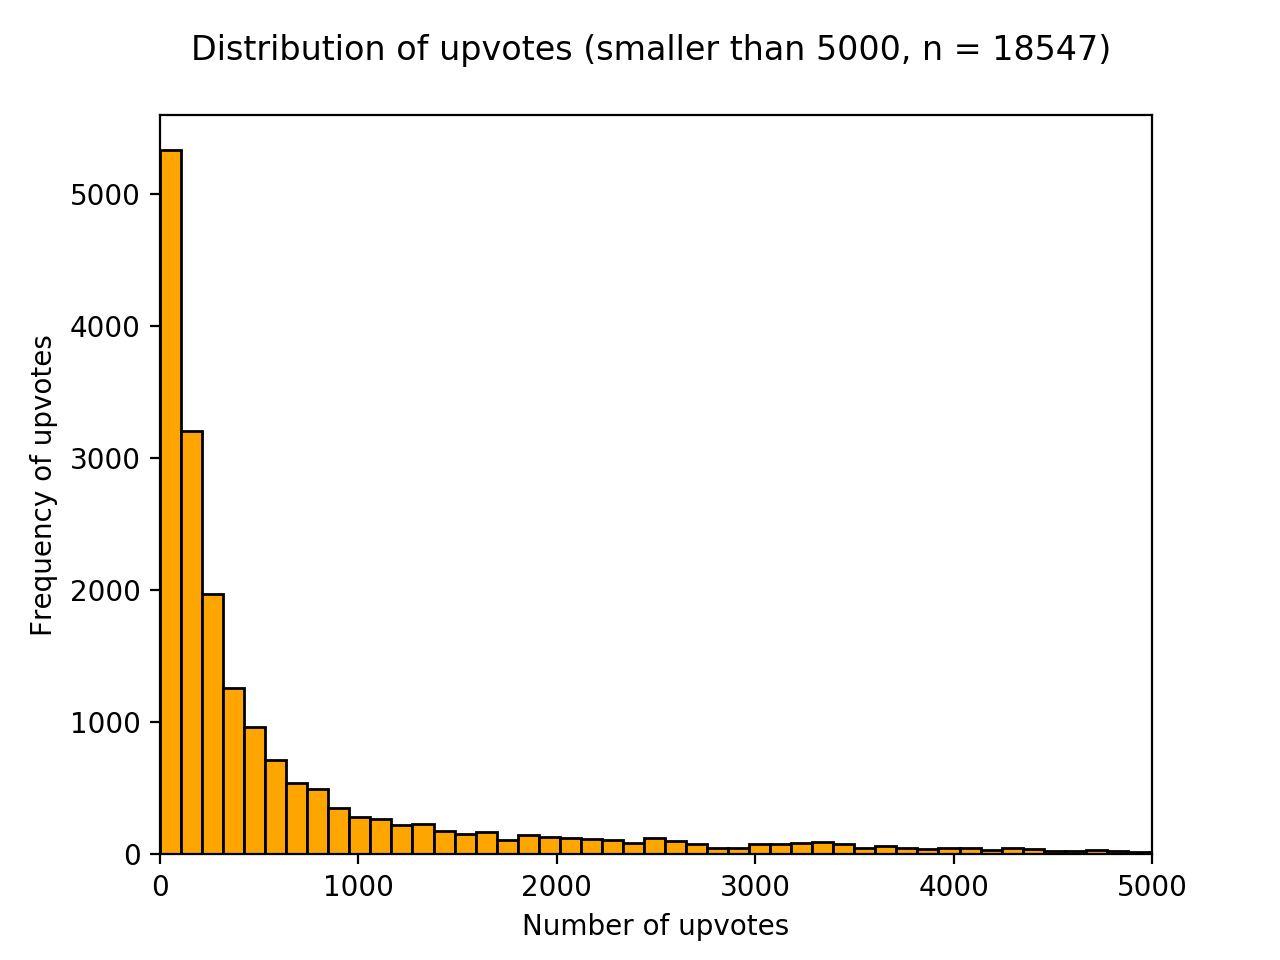

In [474]:
#distribution of scoring
count, bins, ignored = plt.hist(SCORE, 1000, color = 'orange', edgecolor='black')
# # plt.ylim([0, 2500])
plt.xlim([0, 5000])
plt.title('Distribution of upvotes (smaller than 5000, n = 18547) \n')
plt.xlabel('Number of upvotes')
plt.ylabel('Frequency of upvotes')
plt.savefig('output6.png')

<IPython.core.display.Javascript object>


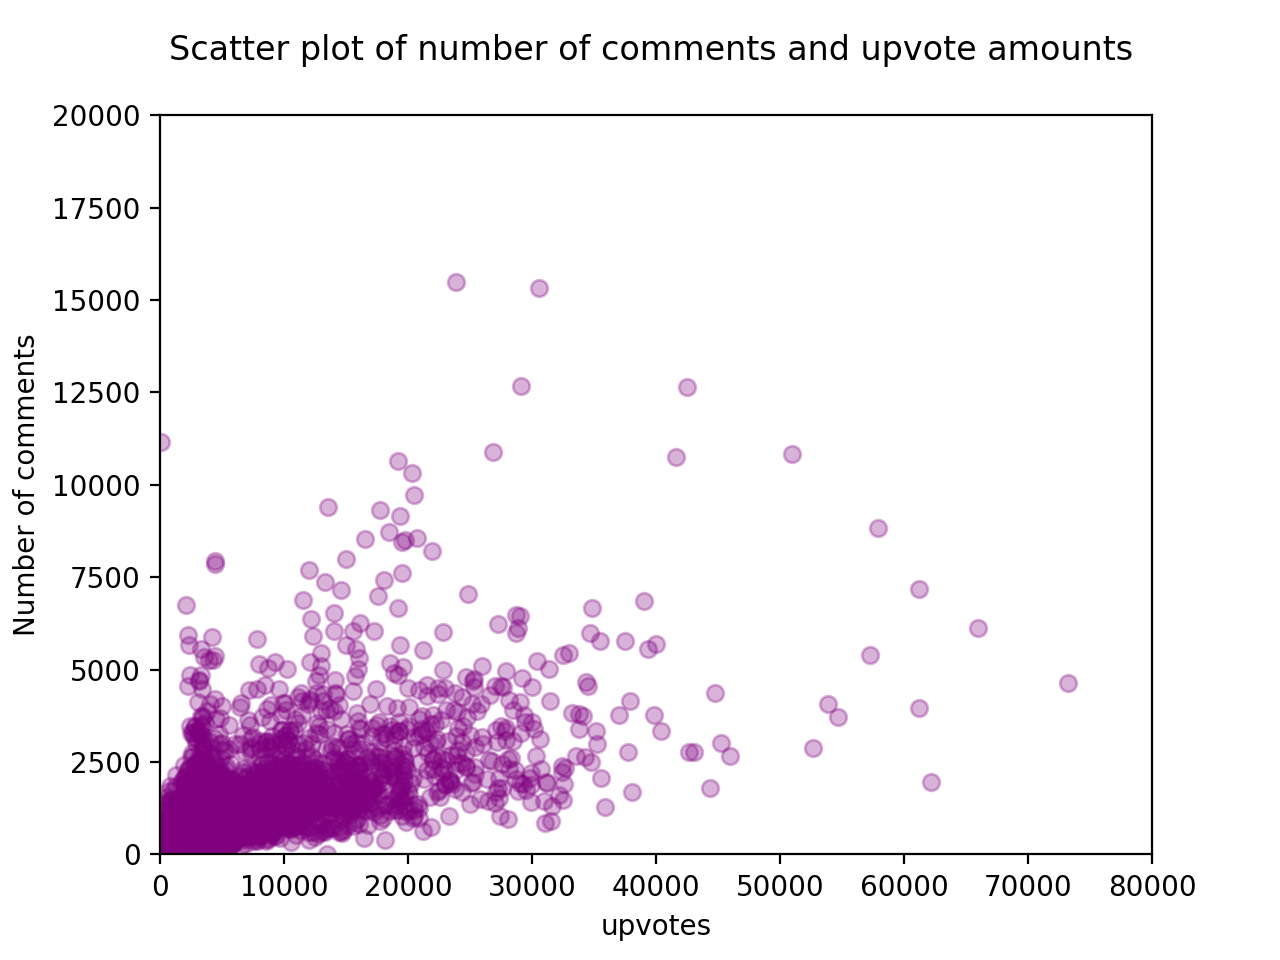

In [476]:
#scatter comments and scoring
plt.scatter(SCORE, NUM_COMMENT, c = 'purple', alpha=0.3)
plt.xlim([0, 80000])
plt.ylim([0, 20000])
plt.title('Scatter plot of number of comments and upvote amounts \n')
plt.ylabel('Number of comments')
plt.xlabel('upvotes')
plt.show()
plt.savefig('output7.png')